In [35]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

from sklearn.impute import SimpleImputer, KNNImputer

In [36]:
df = pd.read_csv("../data/raw/dataset.csv")
print(df.head())

   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  deficiencyanemias  \
0                   0               0         1                  1   
1                   0               0         0                  1   
2                   0               0         0                  1   
3                   0               0         0                  0   
4                   0               0         0                  1   

   depression  Hyperlipemia  Renal failure  COPD  heart rate  \
0           0             1              1     0   68.837838   
1           0             0              0

# 1. Data Preprocessing

In [37]:
# Check data structure and missing values
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (1177, 51)

Data Types:
group                         int64
ID                            int64
outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                      

In [38]:
# Separate features and target
X = df.drop(['outcome', 'group', 'ID'], axis=1, errors='ignore')
y = df['outcome'].copy()

# Remove rows where outcome is missing
valid_mask = y.notna()
X = X[valid_mask]
y = y[valid_mask]

print(f"Original rows: {len(df)}")
print(f"Rows after removing missing outcomes: {len(y)}")
print(f"Removed {(~valid_mask).sum()} rows with missing outcomes")

# Identify column types
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Original rows: 1177
Rows after removing missing outcomes: 1176
Removed 1 rows with missing outcomes

Numerical columns: 48
Categorical columns: 0


In [39]:
# Impute missing values
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

print("Missing values after imputation:", X.isnull().sum().sum())

Missing values after imputation: 0


In [40]:
# normalize numerical features
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Normalize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Preprocessing complete!")
print(f"Final shape: {X_scaled.shape}")

Preprocessing complete!
Final shape: (1176, 48)


# 2. Exploratory Data Analysis (EDA)

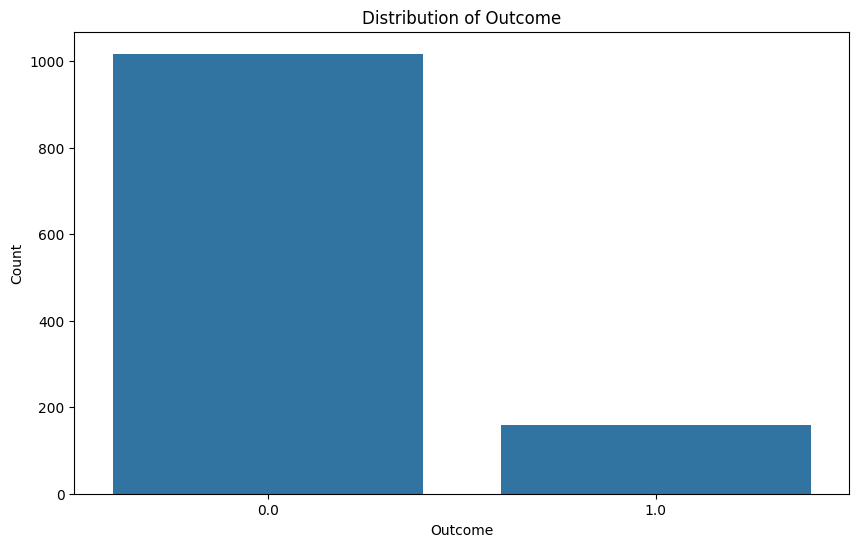


Outcome distribution:
outcome
0.0    1017
1.0     159
Name: count, dtype: int64


In [41]:
# Distribution of outcome variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='outcome')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

print("\nOutcome distribution:")
print(df['outcome'].value_counts())

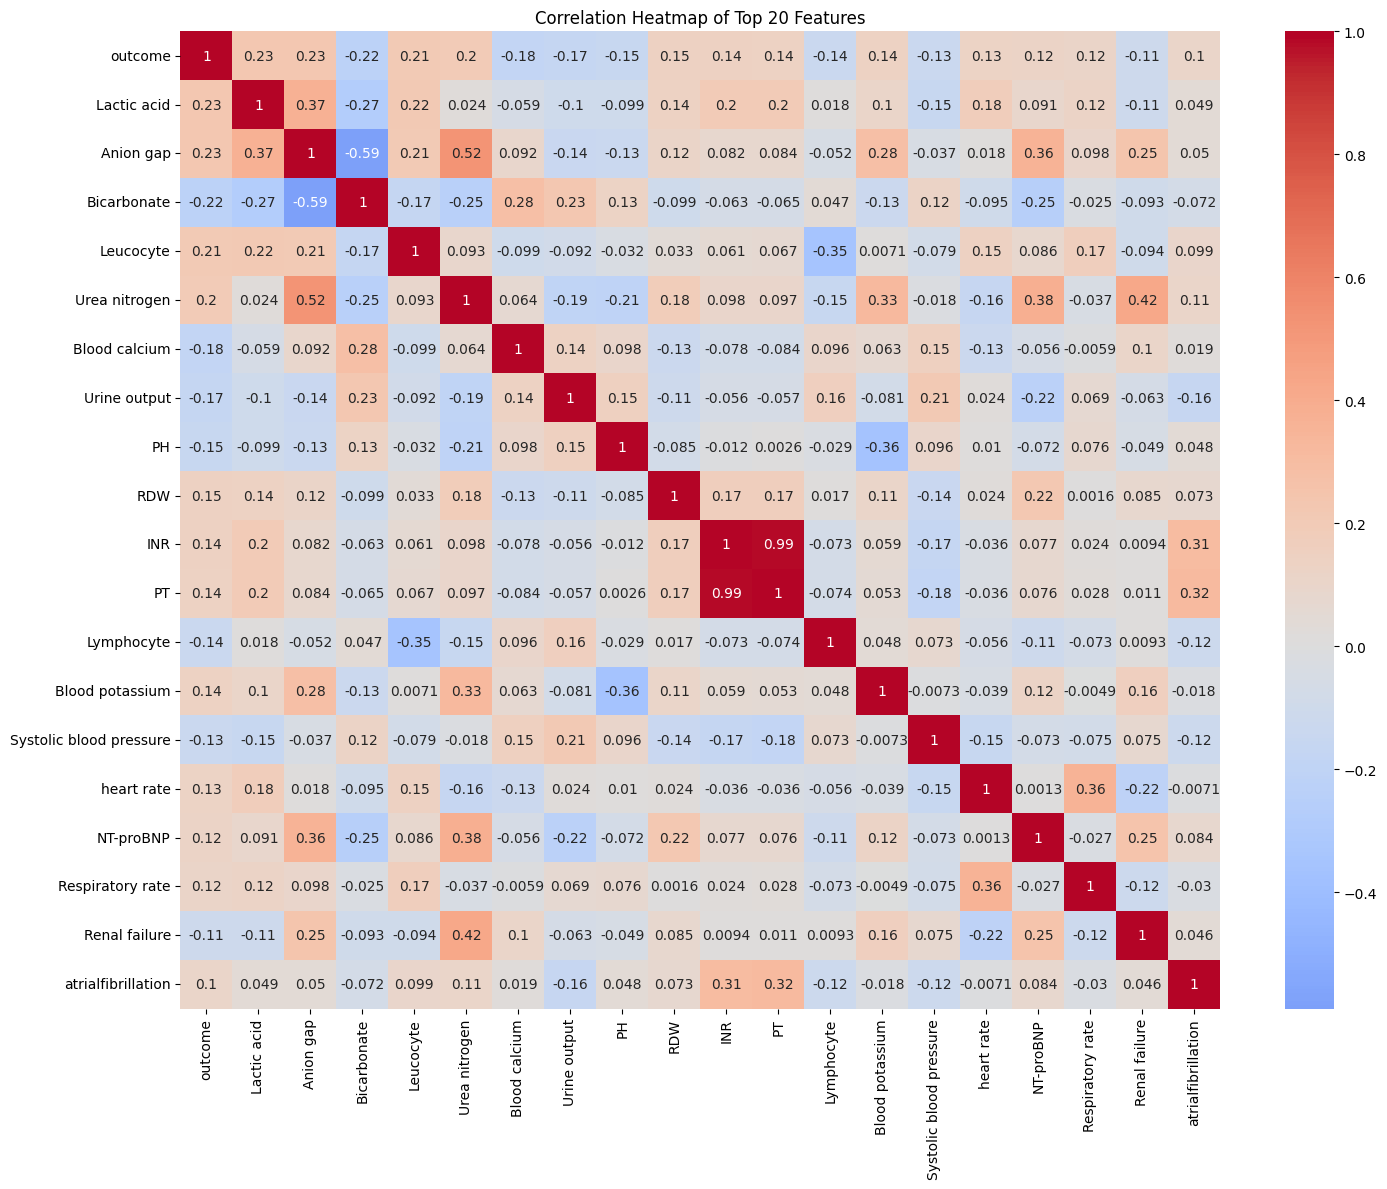

In [42]:
# Correlation heatmap for top features
plt.figure(figsize=(15, 12))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
top_corr_features = corr_matrix['outcome'].abs().sort_values(ascending=False).head(20).index
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top 20 Features')
plt.tight_layout()
plt.show()

In [43]:
X_scaled.to_csv('../data/processed/X_scaled.csv', index=False)
y.to_csv('../data/processed/y.csv', index=False, header=['outcome'])

print("Preprocessed data saved to data/processed/")

Preprocessed data saved to data/processed/
